### 電車の遅延時間から条件付き確率で遅刻する確率を予測

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nltk

In [2]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(nltk.__version__)

In [3]:
# nltk モジュールのダウンロード
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# 定時と遅刻のデータを作成
# 電車遅延時間、定時に来た人数
in_time = [(0, 15), (1, 12), (2, 10), (3, 8),
           (4, 7), (5, 6), (6, 2), (7, 0),
           (8, 0), (9, 0), (10, 0)]
# 電車遅延時間、遅刻した人数
too_late = [(0, 0),(1, 0), (2, 0), (3, 2), (4, 3), 
            (5, 4), (6, 5), (7, 7), (8, 8),
            (9, 7), (10, 4)]

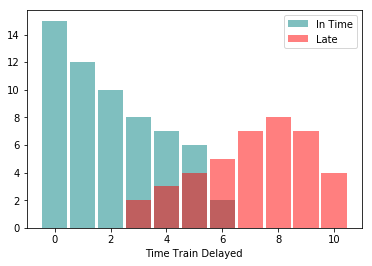

In [5]:
# 分布確認
X, Y = zip(*in_time)
X2, Y2 = zip(*too_late)
plt.bar(X, Y, 0.9, color="teal", alpha=0.50, label="In Time")
plt.bar(X2, Y2, 0.9, color="red", alpha=0.50, label="Late")
plt.legend(loc='upper right')
plt.xlabel('Time Train Delayed')
plt.show()

In [6]:
# 電車が5分遅れたときの遅刻する確率を求める
# P (遅刻 | 5分遅延) = P (5分遅延 | 遅刻) * p(遅刻) / P(5分遅延)

In [7]:
# 遅刻した人数
late = sum(Y2)

In [8]:
late

40

In [9]:
late2 = np.sum(too_late, axis=0)[1]

In [10]:
# ５分遅刻した人数
too_late[5][1]

4

In [11]:
# p (5分遅延 | 遅刻)を求める
min5_late = too_late[5][1] / late2

In [12]:
min5_late

0.1

In [13]:
# p(遅刻)を求める
# 全員
total = np.sum(in_time, axis=0)[1] + np.sum(too_late, axis=0)[1]
print(total)

# 遅刻する確率
prior = late2 / total
print(prior)

100
0.4


In [14]:
# P(5分遅延)を求める
# 電車が5分遅延時の人数
min5_late_total = in_time[5][1] + too_late[5][1]

# P(5分遅延) 
min5 = min5_late_total / total
print(min5)

0.1


In [15]:
# P (遅刻 | 5分遅延)
late_min5 = min5_late * prior / min5

In [16]:
# 電車の遅延時間ごとに遅刻する割合を求める

In [17]:
ontime_pd = pd.DataFrame(in_time, columns=['index', "On Time"])
late_pd = pd.DataFrame(too_late, columns=['index', 'Late'])

result = pd.merge(ontime_pd, late_pd)
result['total'] = result['On Time'] + result['Late']

result

,index,On Time,Late,total
0,0,15,0,15
1,1,12,0,12
2,2,10,0,10
3,3,8,2,10
4,4,7,3,10
5,5,6,4,10
6,6,2,5,7
7,7,0,7,7
8,8,0,8,8
9,9,0,7,7


In [18]:
# 遅刻していて電車の遅延時間ごとの割合
result['possibility'] = result['Late'] / prior

# 遅刻する確率
result['prior'] = prior

# 電車が遅延する確率
result['Delay'] = result['total'] / total

In [19]:
# 電車遅延数分に対して遅刻する確率
result['Possibility_Late'] = result['possibility'] * result['prior'] / result['Delay']
result

,index,On Time,Late,total,possibility,prior,Delay,Possibility_Late
0,0,15,0,15,0.0,0.4,0.15,0.000000
1,1,12,0,12,0.0,0.4,0.12,0.000000
2,2,10,0,10,0.0,0.4,0.10,0.000000
3,3,8,2,10,5.0,0.4,0.10,20.000000
4,4,7,3,10,7.5,0.4,0.10,30.000000
5,5,6,4,10,10.0,0.4,0.10,40.000000
6,6,2,5,7,12.5,0.4,0.07,71.428571
7,7,0,7,7,17.5,0.4,0.07,100.000000
8,8,0,8,8,20.0,0.4,0.08,100.000000
9,9,0,7,7,17.5,0.4,0.07,100.000000


In [20]:
result.iloc[:, [1, 2, 3, 4, 6]].sum()

On Time         60.0
Late            40.0
total          100.0
possibility    100.0
Delay            1.0
dtype: float64